# Starter code for the regression mini-project

- Loads up/formats a modified version of the dataset (why modified?  we've removed some trouble points that you'll find yourself in the outliers mini-project).
- Draws a little scatterplot of the training/testing data
- You fill in the regression code where indicated:

In [19]:
import sys
import pickle
sys.path.append('../utils/')

from feature_format import feature_format, target_feature_split

with open('../17-final-project/final_project_dataset_modified.pkl', 'rb') as f:
    dictionary = pickle.load(f)

- list the features you want to look at--first item in the 
- list will be the "target" feature

In [20]:
# features_list = ['bonus', 'long_term_incentive']
features_list = ['bonus', 'salary']
data = feature_format(dictionary, features_list, remove_any_zeroes=True, sort_keys='../utils/python2_lesson06_keys.pkl')
target, features = target_feature_split(data)

training-testing split needed in regression, just like classification:

In [21]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = 'b'
test_color = 'r'

## ↓↓↓ Your Code Goes Here ↓↓↓

Please name it reg, so that the plotting code below picks it up and plots it correctly. 

Don't forget to change `the test_color` above from `'b'` to `'r'` to differentiate training points from test points.

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(feature_train, target_train)

print("Slope: {}".format(reg.coef_))
print("Intercept: {}".format(reg.intercept_))

print("Score on training data: {}".format(reg.score(feature_train, target_train)))
print("Score on test data: {}".format(reg.score(feature_test, target_test)))


Slope: [1.19214699]
Intercept: 554478.7562150091
Score on training data: 0.21708597125777662
Score on test data: -0.5927128999498643


# Plot results
- draw the scatterplot, with color-coded training and testing points
- draw the regression line, once it's coded

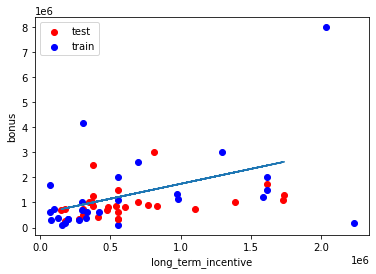

In [23]:
import matplotlib.pyplot as plt

for feature, target in zip(feature_test, target_test):
    plt.scatter(feature, target, color=test_color)

for feature, target in zip(feature_train, target_train):
    plt.scatter(feature, target, color=train_color)

# labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label='test')
plt.scatter(feature_train[0], target_train[0], color=train_color, label='train')

try:
    plt.plot(feature_test, reg.predict(feature_test))
except NameError:
    pass

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()